## Exploratory Data Analysis for Image Dataset
For starters, we will be experiencing an EDA for finding the best, simple features from our image dataset.
Remember, our aim is to create an image classification model, and deploy it to production.  
Let's try to create an ML model that has a good performance and resource friendly.

### Preparation
- Have a "hungry for learning" mentality
- Install prerequisites dependencies  
  - pandas
  - numpy
  - matplotlib
  - opencv-python
  - scikit-image
  - scikit-learn
- Download the required dataset
  - Books and Non Books Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog, local_binary_pattern
from sklearn.preprocessing import StandardScaler

### Preparing Raw Image Folders for EDA
Download link:

In [1]:
BOOK_DATASET_FOLDER = "data/books"
NONBOOK_DATASET_FOLDER = "data/non_books"

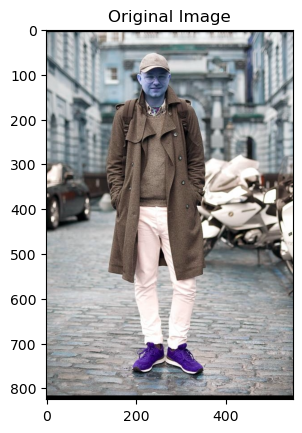

In [4]:
def load_image(path):
    # Load the image
    image = cv2.imread(path)

    # Display the image
    plt.imshow(image)
    plt.title('Original Image')
    plt.show()

    return image

image = load_image(f'{NONBOOK_DATASET_FOLDER}/image_4.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### Understanding the Image Properties
This is a very important activities before we use image data as our ML dataset.
As we have explained, ML Model cannot understand image.
Image need to be transformed into floating number so it could be learned by ML Model

In [5]:
# Get image properties
dimensions = image.shape
height, width, channels = dimensions

print(f'Dimensions: {dimensions}')
print(f'Height: {height}, Width: {width}, Channels: {channels}')

Dimensions: (825, 550, 3)
Height: 825, Width: 550, Channels: 3


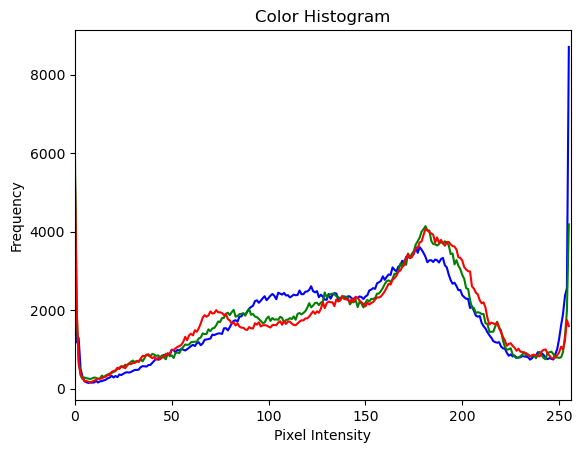

In [6]:
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram, color=col)
    plt.xlim([0, 256])

plt.title('Color Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


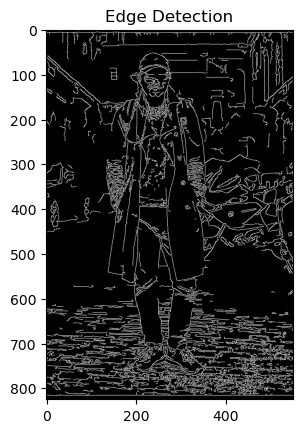

In [7]:
edges = cv2.Canny(image, 100, 200)

plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.show()


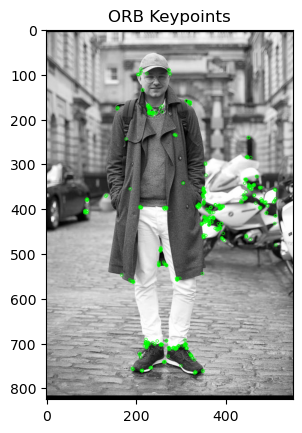

In [8]:
# Initiate ORB detector
orb = cv2.ORB_create()

# Find the keypoints with ORB
keypoints, descriptors = orb.detectAndCompute(image, None)

# Draw only keypoints location, not size and orientation
image_with_keypoints = cv2.drawKeypoints(image_rgb, keypoints, None, color=(0, 255, 0), flags=0)

plt.imshow(image_with_keypoints)
plt.title('ORB Keypoints')
plt.show()


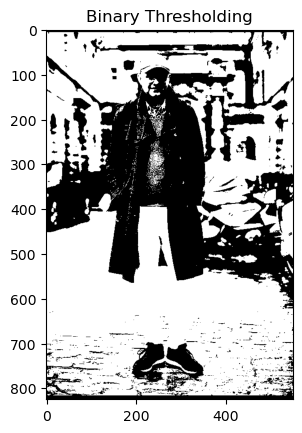

In [9]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a binary threshold to get a binary image
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(thresh, cmap='gray')
plt.title('Binary Thresholding')
plt.show()


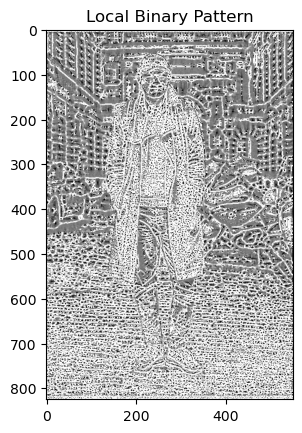

In [10]:
# Parameters for LBP
radius = 3
n_points = 8 * radius

# Apply LBP
lbp = local_binary_pattern(gray, n_points, radius, method='uniform')

plt.imshow(lbp, cmap='gray')
plt.title('Local Binary Pattern')
plt.show()


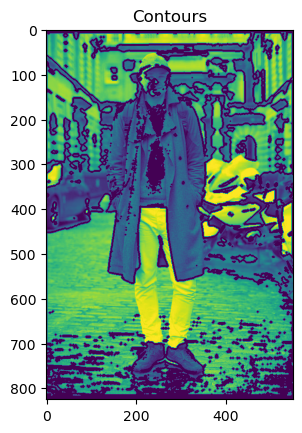

In [11]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
image_contours = image_rgb.copy()
cv2.drawContours(image_contours, contours, -1, (0, 255, 0), 3)

plt.imshow(image_contours)
plt.title('Contours')
plt.show()


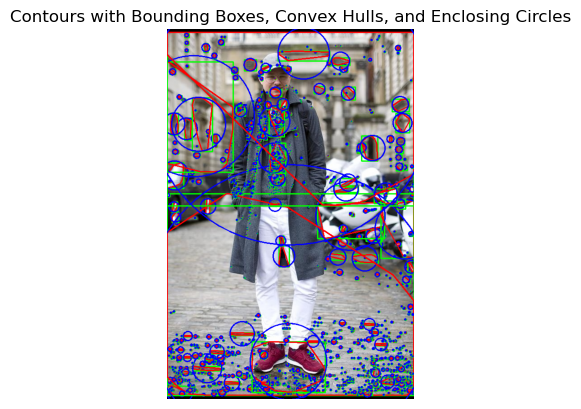

In [12]:
# Load the image
image_path = f'{NONBOOK_DATASET_FOLDER}/image_4.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Thresholding to create a binary image
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding box, convex hull, and enclosing circle
image_contours = image_rgb.copy()

for contour in contours:
    # Bounding box
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image_contours, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Convex hull
    hull = cv2.convexHull(contour)
    cv2.drawContours(image_contours, [hull], 0, (255, 0, 0), 2)

    # Enclosing circle
    (x, y), radius = cv2.minEnclosingCircle(contour)
    center = (int(x), int(y))
    radius = int(radius)
    cv2.circle(image_contours, center, radius, (0, 0, 255), 2)

# Display the image with bounding boxes, convex hulls, and enclosing circles
plt.imshow(image_contours)
plt.title('Contours with Bounding Boxes, Convex Hulls, and Enclosing Circles')
plt.axis('off')
plt.show()


In [13]:
for contour in contours:
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    print(f'Contour Area: {area}, Perimeter: {perimeter}')

Contour Area: 0.0, Perimeter: 2.0
Contour Area: 1.0, Perimeter: 4.0
Contour Area: 5.5, Perimeter: 15.41421353816986
Contour Area: 0.5, Perimeter: 5.414213538169861
Contour Area: 0.0, Perimeter: 0.0
Contour Area: 9.0, Perimeter: 23.656854152679443
Contour Area: 0.0, Perimeter: 4.0
Contour Area: 3.5, Perimeter: 9.41421353816986
Contour Area: 0.0, Perimeter: 0.0
Contour Area: 0.0, Perimeter: 0.0
Contour Area: 0.0, Perimeter: 2.0
Contour Area: 0.5, Perimeter: 7.414213538169861
Contour Area: 0.0, Perimeter: 0.0
Contour Area: 22.5, Perimeter: 37.21320295333862
Contour Area: 314.5, Perimeter: 194.81118214130402
Contour Area: 2.0, Perimeter: 5.656854152679443
Contour Area: 27.5, Perimeter: 28.727921843528748
Contour Area: 4.0, Perimeter: 7.656854152679443
Contour Area: 6.0, Perimeter: 9.656854152679443
Contour Area: 2.0, Perimeter: 5.656854152679443
Contour Area: 4.0, Perimeter: 7.656854152679443
Contour Area: 5.5, Perimeter: 10.242640614509583
Contour Area: 0.5, Perimeter: 3.414213538169861
C

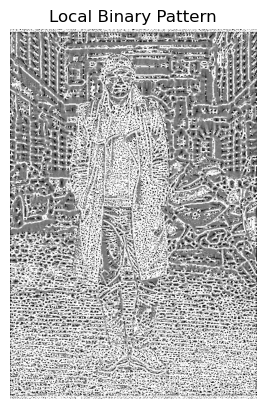

In [14]:
radius = 3
n_points = 8 * radius
lbp = local_binary_pattern(gray, n_points, radius, method='uniform')

plt.imshow(lbp, cmap='gray')
plt.title('Local Binary Pattern')
plt.axis('off')
plt.show()


### Image Data Feature Extraction

In [15]:
# Function to read and preprocess the image
def read_and_preprocess_image(image_path, target_size=(128, 128)):
    """
    Read and preprocess the image: resize, convert to RGB and grayscale.

    :param image_path: Path to the image file.
    :param target_size: Desired size to resize the image to (width, height).
    :return: Tuple containing the resized image, RGB image, and grayscale image.
    """
    # Read the image from the given path
    image = cv2.imread(image_path)

    # Resize the image to the target size
    image_resized = cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)

    # Convert the resized image to RGB
    image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)

    # Convert the resized image to grayscale
    gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)

    return image_resized, image_rgb, gray

# Function to extract HOG features
def extract_hog_features(image):
    hog_features, _ = hog(image, visualize=True, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')
    return hog_features

# Function to extract color histogram features
def extract_color_histogram(image):
    color_features = []
    for i, col in enumerate(('b', 'g', 'r')):
        histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
        histogram = cv2.normalize(histogram, histogram).flatten()
        color_features.extend(histogram)
    return np.array(color_features)

# Function to extract LBP features
def extract_lbp_features(image):
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    return hist

# Function to extract shape features (area and perimeter of largest contour)
def extract_shape_features(image):
    ret, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        area = cv2.contourArea(largest_contour)
        perimeter = cv2.arcLength(largest_contour, True)
        return np.array([area, perimeter])
    else:
        return np.array([0, 0])

# Main function to extract all features and create a feature vector
def extract_features(image_path):
    image, image_rgb, gray = read_and_preprocess_image(image_path)

    hog_features = extract_hog_features(gray)
    color_histogram = extract_color_histogram(image_rgb)
    lbp_features = extract_lbp_features(gray)
    shape_features = extract_shape_features(gray)

    features = np.concatenate([hog_features, color_histogram, lbp_features, shape_features])
    return features


In [16]:
import os
import tqdm
from tqdm import tqdm

NUMBER_OF_DATA = 500

all_data = []

nonbook_image_paths = [os.path.join(NONBOOK_DATASET_FOLDER, f) for f in os.listdir(NONBOOK_DATASET_FOLDER)[:NUMBER_OF_DATA] if f.endswith(('.jpg', '.jpeg', '.png'))]
book_image_paths = [os.path.join(BOOK_DATASET_FOLDER, f) for f in os.listdir(BOOK_DATASET_FOLDER)[:NUMBER_OF_DATA] if f.endswith(('.jpg', '.jpeg', '.png'))]

all_data = nonbook_image_paths + book_image_paths

len(all_data)

1000

In [17]:
# Extract features from each image
feature_list = []

for image_path in tqdm(all_data):
    features = extract_features(image_path)
    feature_list.append(features)

# Convert the list of feature vectors into a DataFrame
features_matrix = pd.DataFrame(feature_list)

100%|██████████| 1000/1000 [00:27<00:00, 35.91it/s]


In [18]:
features_matrix

,0,1,2,3,4,5,6,7,8,9,...,8886,8887,8888,8889,8890,8891,8892,8893,8894,8895
0,0.265445,0.171490,0.224768,0.247272,0.265445,0.265445,0.265445,0.040682,0.039200,0.244257,...,0.011536,0.012024,0.014587,0.016541,0.022522,0.024109,0.048218,0.430908,10888.0,1157.528999
1,0.074536,0.016463,0.095302,0.070046,0.350081,0.341382,0.004783,0.000000,0.006816,0.121744,...,0.008423,0.009949,0.011292,0.014648,0.020813,0.037781,0.053162,0.495483,14087.5,893.428493
2,0.017999,0.000000,0.002207,0.033813,0.232057,0.169908,0.012141,0.051148,0.000000,0.274208,...,0.011597,0.012756,0.012207,0.015381,0.022217,0.028564,0.041931,0.414673,9062.0,1325.494509
3,0.019357,0.007972,0.011562,0.061638,0.434169,0.057858,0.007498,0.000000,0.013285,0.016620,...,0.012024,0.010315,0.014343,0.017029,0.023193,0.028992,0.049683,0.462769,7123.0,1122.523947
4,0.293007,0.027027,0.310565,0.310565,0.310565,0.304063,0.127522,0.142575,0.070722,0.310565,...,0.012512,0.011414,0.010376,0.015076,0.020569,0.028931,0.050354,0.451782,4664.5,741.546244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.000000,0.000000,0.000000,0.118496,0.000000,0.000000,0.000000,0.000000,0.002962,...,0.009521,0.013916,0.017944,0.022095,0.038940,0.044373,0.298035,0.313904,16129.0,508.000000
996,0.030129,0.014543,0.006555,0.005182,0.019699,0.011438,0.020543,0.015601,0.000000,0.248902,...,0.016235,0.013306,0.014465,0.015320,0.018066,0.026733,0.044373,0.359131,13500.0,882.024385
997,0.100452,0.009766,0.104202,0.324070,0.324070,0.324070,0.000000,0.000000,0.000000,0.087349,...,0.009644,0.009460,0.008301,0.013123,0.020630,0.029724,0.056763,0.453735,7097.0,403.740114
998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.009644,0.008667,0.008484,0.011169,0.009827,0.008301,0.412598,0.217102,3.5,9.414214


In [19]:
from sklearn.decomposition import PCA

# Normalize the feature matrix
scaler = StandardScaler()
normalized_features_matrix = scaler.fit_transform(features_matrix)

# Apply PCA for dimensionality reduction, preserving 95% of the variance
pca = PCA(n_components=50)  # Use percentage of variance explained
pca_features_matrix = pca.fit_transform(features_matrix)
print(pca_features_matrix)

[[ 3.30146108e+03  3.38162326e+02 -1.92796406e+00 ... -1.44964409e-02
   1.22106544e-01  1.00819700e+00]
 [ 6.49401908e+03  3.44533747e-01 -2.53542694e+00 ... -5.74213136e-01
  -1.00427286e+00 -3.62585012e-01]
 [ 1.47982061e+03  5.48193913e+02 -2.10274953e-01 ... -1.53908231e-01
  -9.24114159e-03 -6.20150029e-02]
 ...
 [-5.05915270e+02 -3.28002292e+02  2.44222924e-01 ...  1.81730879e-01
  -2.27912259e-02  4.25005904e-01]
 [-7.60662267e+03 -5.58629306e+02  1.31835386e+00 ...  4.30230373e-01
  -5.33998077e-01 -4.55485395e-01]
 [ 8.52608709e+03 -4.32080187e+02  2.34424872e+00 ...  8.85615686e-01
  -6.86279550e-02  9.47048886e-03]]


In [20]:
pca_features_matrix.shape

(1000, 50)

## Model Development for Book Image Classification
It's time to create an ML Classification Model for detecting a non-book image for Yanto.
Here we will be using the image features that has been generated in the previous section and create a
simple ML Classification Model.
Let's see how it goes

### ML Algorithms Used in this Section
- LogisticRegression

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression


### Split the dataset into training and testing sets

In [22]:
labels = [0 if 'non_books' in path else 1 for path in all_data]

X_train, X_test, y_train, y_test = train_test_split(pca_features_matrix, labels, test_size=0.2, random_state=42)

### Train and Evaluate some ML Model

In [25]:
import mlflow
from mlflow.models import infer_signature

mlflow.set_tracking_uri('http://localhost:8080')
mlflow.set_experiment('book-classification')


with mlflow.start_run():
    clf = LogisticRegression(random_state=42)
    clf.fit(X_train, y_train)
    signature = infer_signature(X_test, clf.predict(X_test))

    model_info = mlflow.sklearn.log_model(
        sk_model=clf, artifact_path="model", signature=signature
    )

    # Make predictions
    y_pred = clf.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)

    # Log metrics
    mlflow.log_metric("accuracy", accuracy)

    # Logging each value of the classification report
    for key, value in class_report.items():
        if isinstance(value, dict):
            for sub_key, sub_value in value.items():
                mlflow.log_metric(f"{key}_{sub_key}", sub_value)
        else:
            mlflow.log_metric(key, value)

    # Print metrics
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))


2024/05/18 13:02:16 INFO mlflow.tracking.fluent: Experiment with name 'book-classification' does not exist. Creating a new experiment.
/home/abid/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2024/05/18 13:02:17 WARNING mlflow.utils.requirements_utils: Found lz4 version (3.1.3+dfsg) contains a local version label (+dfsg). MLflow logged a pip requirement for this package as 'lz4==3.1.3' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` 

Accuracy: 0.985
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98        96
           1       0.98      0.99      0.99       104

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



### Testing the ML Model

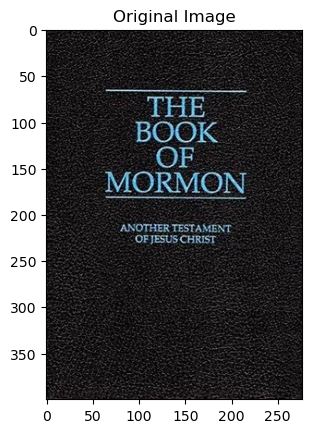

This is a : Book


In [35]:
# Function to predict the class of a new image
def predict_image(image_path, model, scaler, pca):
    features = extract_features(image_path)
    features = features.reshape(1, -1)
    features_normalized = scaler.transform(features)
    features_pca = pca.transform(features_normalized)

    prediction = model.predict(features_pca)

    if prediction[0] == 0:
        return 'Non-Book'
    else:
        return 'Book'


sklearn_pyfunc = mlflow.pyfunc.load_model(model_uri=model_info.model_uri)


# Example usage for prediction on a new image
new_image_path = f'{BOOK_DATASET_FOLDER}/image_430.jpg'
predicted_class = predict_image(new_image_path, sklearn_pyfunc, scaler, pca)
load_image(new_image_path)
print("This is a :", predicted_class)

## Model Deployment for Book Image Classification
We almost reach our end of the journey, now it's time to create deploy our ML Model to that it could be integrated with another system.


### Preparation
- Install prerequisites dependencies  
  - mlflow

In [27]:
# run the deployment script
!run.sh

/bin/bash: line 1: run.sh: command not found


In [28]:
# Get the features of the new image

# Function to predict the class of a new image
def preprocessing(image_path, scaler, pca):
    features = extract_features(image_path)
    features = features.reshape(1, -1)
    features_normalized = scaler.transform(features)
    features_pca = pca.transform(features_normalized)
    return features_pca

features = preprocessing(new_image_path, scaler, pca)
features

array([[-7.61022490e+03, -5.66934292e+02,  6.27515672e-01,
        -5.78285751e+00,  6.27512330e-01, -1.40286075e+01,
         3.38963532e+00,  5.52490394e+00,  1.43464716e+01,
        -1.29227388e+00, -1.11533635e+01, -1.08052700e+01,
        -1.57345577e+00,  1.19299416e+01,  3.20184164e+00,
        -1.04193902e+01, -8.80573694e+00,  6.49918034e+00,
        -1.55681270e+00,  8.53608740e+00, -5.31421671e+00,
         6.17885939e+00, -6.29142312e+00, -8.65726373e+00,
        -3.75235811e+00,  6.93473534e+00,  1.35702776e+00,
        -6.29909374e+00, -5.76028713e-01, -1.57311935e+00,
         5.76090611e+00,  5.25017381e+00,  5.56546009e+00,
        -4.20018214e-01, -6.41554224e+00, -8.21158795e+00,
         4.92217383e+00,  2.57189637e+00, -8.82913648e+00,
         3.32275315e+00, -3.95203175e+00,  9.74145946e-01,
         3.08768640e+00,  5.92829335e+00,  7.40756968e+00,
         1.45196885e+00, -5.16920843e+00,  2.94739271e+00,
         7.24456207e+00,  1.86909127e+00]])

In [36]:
import requests
import json

headers = {
    'Content-Type': 'application/json;',
}

json_data = json.dumps({
    'inputs': features.tolist()
})

response = requests.post('http://127.0.0.1:5000/invocations', headers=headers, data=json_data)

In [37]:
response.content

b'<!doctype html>\n<html lang=en>\n<title>404 Not Found</title>\n<h1>Not Found</h1>\n<p>The requested URL was not found on the server. If you entered the URL manually please check your spelling and try again.</p>\n'